In [1]:
#import pandas library
#use pip install to install the library if not preinstalled
import pandas as pd

In [2]:
#import faker library
#use pip install to install the library if not preinstalled
from faker import Faker

In [3]:
#import random library
#use pip install to install the library if not preinstalled
import random as random

In [4]:
# Initialise faker to set up random seed for for reproducibility
fake = Faker()
Faker.seed(42)
random.seed(42)

In [5]:
# Define the number of records you want to generate
# Define unique number of users to be present in your dataset
n = 55000  # Number of records
num_customers = 39000  # Number of unique customers

In [6]:
# Generate a pool of unique customer IDs
# You can choose your own combination, numeric, alphanumeric, alphabet only
customer_ids = [fake.random_number(digits=6, fix_len=True) for x in range(num_customers)]

### DATASET LOGIC
The difference between a regular stimulated dataset and that of a real world dataset is the biases in the data. 
In order to make the dataset more similar to the real world data, we have assigned weights and probability to some of the most common features/variables to replicate the real world data.

It is entirely upto to you to change this or introduce more variables or a different weight / bias logic.

In [7]:
#product category assign weight to introduce bias
product_cat = ['Electronics', 'Clothing', 'Beauty and Health', 'Sports & Fitness','Books', 'Home & Kitchen', 'Pet Care', 'Toys & Games', 'Other']
category_weights = [0.3, 0.2, 0.15, 0.1, 0.05, 0.1, 0.03, 0.03, 0.04]  #Assuming electronics is the most common purchase , followed closely by Clothing

#assign gender groups
gender_options = ['Female', 'Male', 'Other']

#assign some discount campaigns to track conversions
discount_names = ['NEWYEARS', 'SEASONALOFFER21', 'FESTIVE50', 'SAVE10', 'WELCOME5']
discount_weights =[0.3,0.25,0.15,0.15,0.15]

#assign a basket of payment methods commonly known and used
purchase_methods = ['Credit Card', 'Debit Card', 'Net Banking', 'Cash on Delivery', 
                    'Paytm UPI', 'Google Pay UPI', 'PhonePe UPI', 'International Card']
method_weights = [0.4, 0.25, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05] #assign weights for purchase methods

#assign a list of cities for geopraphic distribution understanding
cities = ['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad', 
          'Chennai', 'Kolkata', 'Pune', 'Jaipur', 'Lucknow','Srinagar',
          'Varanasi','Dehradun', 'Other']
city_weights = [0.2, 0.2, 0.15, 0.1, 0.05, 
                0.08, 0.05, 0.07, 0.03, 0.02, 0.01, 0.01, 0.01, 0.02]

#assign a list of age grouping for demographic distribution
age_groups= ['under 18','18-25', '25-45','45-60','60 and above']
agegroupweights= [0.05, 0.3, 0.4, 0.2, 0.05]

In [8]:
# Define a yearly growth factor to simulate slight year-on-year growth
growth_factors = {
    2019: 1.0,   # Baseline sales for 2019
    2020: 1.05,  # 5% growth in 2020
    2021: 1.1,   # 10% growth in 2021
    2022: 1.15,  # 15% growth in 2022
    2023: 1.2,   # 20% growth in 2023
    2024: 1.25   # 25% growth in 2024
}

# Define a seasonal adjustment factor for each month
seasonal_factors = {
    1: 0.9,  # January, slightly lower sales (post-holiday)
    2: 0.85, # February
    3: 0.95, # March
    4: 1.0,  # April, neutral
    5: 1.0,  # May, neutral
    6: 0.9,  # June, lower sales (mid-year dip)
    7: 0.9,  # July
    8: 1.0,  # August, neutral
    9: 1.05, # September, slight increase in sales
    10: 1.1, # October, pre-holiday sales
    11: 1.3, # November, peak sales (holiday season)
    12: 1.4  # December, peak sales (holiday season)
}

### ABOUT THE DATASET
This dataset contains transactional data from an e-commerce or retail platform, capturing customer demographics, purchase details, and sales-related metrics. 

This datset can be used for Data Cleaning and Preprocessing, EDA, Data Visualisation as well as Machine Learning and Statistical Analysis. 

- `CID` - Unique Customer ID for tracking individual customers.
- `TID` - Unique Transaction ID for each purchase.
- `Gender` - Customer’s gender (e.g., Male/Female).
- `Age Group` - Customer’s age group (e.g., 18-25, 25-45).
- `Purchase Date` - Date and time of the transaction.
- `Product Category` - The category of the purchased product (e.g., Electronics, Clothing).
- `Discount Availed` - Indicates whether a discount was used (Yes/No).
- `Discount Name` - The specific discount or promotion applied (e.g., NEWYEAR2024).
- `Discount Amount (INR)` - Value of the discount in Indian Rupees.
- `Gross Amount` - Total cost of the transaction before any discount.
- `Net Amount` - Final amount paid after discount application.
- `Purchase Method` - Payment method used (e.g., Credit Card, UPI, Cash on Delivery).
- `Location` - Customer’s location or city.

##### * This is not a real data. This dataset has been generated used python's faker library for the purpose of learning. *

In [9]:
#Generate data using the faker library for column headers where data 
#has to be simulated

data = [] #create an empty list
for _ in range(n):
    customer_id = random.choice(customer_ids)  # Select from the pool of customer IDs
    gender = random.choices(gender_options)[0]
    product_category = random.choices(product_cat, weights=category_weights, k=1)[0] #includes the weights assigned logic 
    purchase_method = random.choices(purchase_methods, weights=method_weights, k=1)[0] #includes the weights assigned logic
    age_group = random.choices(age_groups, weights=agegroupweights, k=1)[0]
    transaction_id = fake.random_number(digits=10, fix_len=True)  
    customer_location = random.choices(cities, weights=city_weights, k=1)[0]
    
    # Discount logic
    discount_applied = random.choice(['Yes', 'No'])
    if discount_applied == 'Yes':
        discount_name = random.choices(discount_names, weights=discount_weights, k=1)[0]  # Use random.choices with weights
        discount_amount = round(random.uniform(50.0, 500.0), 2)  # Random discount between INR 50 and INR 500
    else:
        discount_name = None
        discount_amount = 0.0
    
    # Generate a random purchase date and extract the year and month
    purchase_date = fake.date_time_between(start_date='-5y', end_date='now')
    purchase_year = purchase_date.year  # Extract the year
    purchase_month = purchase_date.month  # Extract the month
    
    # Gross and net amount calculation with Yearly Growth and Seasonal Factors
    base_gross_amount = round(random.uniform(150.0, 5000.0), 2)  # Random gross amount
    
    # Apply year-on-year growth (minimal increase each year)
    gross_amount_with_growth = base_gross_amount * growth_factors[purchase_year]
    
    # Apply seasonal peaks/drops based on the purchase month
    gross_amount = gross_amount_with_growth * seasonal_factors[purchase_month]
    
    # Calculate net amount after applying the discount
    net_amount = gross_amount - discount_amount

    # Append the generated data to the list
    data.append([
        customer_id, transaction_id, gender, age_group, purchase_date.strftime('%d/%m/%Y %H:%M:%S'), product_category, 
        discount_applied, discount_name, discount_amount, gross_amount, net_amount, purchase_method, customer_location
    ])

In [10]:
# Convert to DataFrame
df = pd.DataFrame(data, columns=[
    'CID', 'TID', 'Gender', 'Age Group', 'Purchase Date', 'Product Category', 
    'Discount Availed', 'Discount Name', 'Discount Amount (INR)', 
    'Gross Amount', 'Net Amount', 'Purchase Method', 'Location'])

In [11]:
# Save the dataset to a CSV file
df.to_csv('project1_df.csv', index=False)

### Exploratory Data Analysis and Visualisation

In [12]:
# Display the first few rows of the DataFrame
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,None,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [14]:
df.shape

(55000, 13)

In [15]:
df.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [16]:
#including categorical variables
df.describe(include='all')

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
count,55000.000000,5.500000e+04,55000,55000,55000,55000,55000,27415,55000.000000,55000.000000,55000.000000,55000,55000
unique,NaN,NaN,3,5,54988,9,2,5,NaN,NaN,NaN,8,14
top,NaN,NaN,Female,25-45,04/07/2022 11:45:29,Electronics,No,NEWYEARS,NaN,NaN,NaN,Credit Card,Mumbai
freq,NaN,NaN,18454,22010,2,16574,27585,8135,NaN,NaN,NaN,22096,11197
mean,551245.593891,5.504740e+09,NaN,NaN,NaN,NaN,NaN,NaN,136.986796,3012.936606,2875.949810,NaN,NaN
std,260603.330337,2.594534e+09,NaN,NaN,NaN,NaN,NaN,NaN,165.375502,1718.431066,1726.127778,NaN,NaN
min,100009.000000,1.000163e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,136.454325,-351.119775,NaN,NaN
25%,323717.000000,3.252604e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1562.111325,1429.551863,NaN,NaN
50%,550088.500000,5.498383e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2954.266150,2814.910875,NaN,NaN
75%,776955.750000,7.747933e+09,NaN,NaN,NaN,NaN,NaN,NaN,274.115000,4342.221675,4211.407838,NaN,NaN


In [17]:
df.isna().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [18]:
df['Discount Name'].fillna('None', inplace=True)

In [19]:
df.isna().sum()

CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64

In [20]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


#### Introducing Year, Date and Month column for further insights

In [21]:
df['Year'] = pd.to_datetime(df['Purchase Date']).dt.year
df['Month'] = pd.to_datetime(df['Purchase Date']).dt.month
df['Date'] = pd.to_datetime(df['Purchase Date']).dt.date

In [22]:
df.head(5)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Date
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,2023,8,2023-08-30
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,2024,2,2024-02-23
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,2022,6,2022-06-03
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,None,0.00,5695.612650,5695.612650,Debit Card,Delhi,2020,4,2020-04-11
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,2022,5,2022-05-31


In [23]:
df.tail(5)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Date
54995,295864,5407639888,Other,25-45,23/02/2020 10:42:04,Electronics,Yes,SEASONALOFFER21,110.89,2819.9073,2709.0173,Debit Card,Other,2020,2,2020-02-23
54996,706435,1144029904,Other,18-25,12/07/2021 15:59:21,Electronics,Yes,SEASONALOFFER21,488.59,3891.3039,3402.7139,Cash on Delivery,Bangalore,2021,12,2021-12-07
54997,649435,9587323189,Male,45-60,02/08/2024 09:30:44,Home & Kitchen,Yes,NEWYEARS,417.63,4094.6875,3677.0575,Credit Card,Mumbai,2024,2,2024-02-08
54998,982183,5032564481,Female,45-60,05/08/2020 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.4735,3772.9135,Credit Card,Kolkata,2020,5,2020-05-08
54999,126691,9172953722,Male,25-45,21/07/2022 09:05:18,Beauty and Health,Yes,NEWYEARS,380.81,3703.5819,3322.7719,Credit Card,Mumbai,2022,7,2022-07-21


#### Detecting outliers in the dataset:

This is beneficial to understand if the dataset is affected strongly by the outliers are not. You can choose to retain them or remove them depending on how they are affecting your dataset's performance

In [24]:
#import visualisation library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<Axes: xlabel='Gross Amount'>

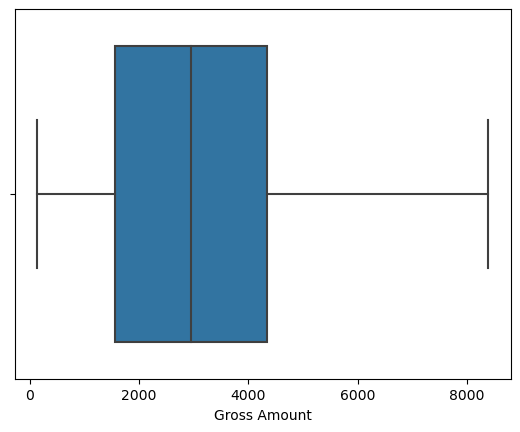

In [25]:
sns.boxplot(x=df['Gross Amount'])

#### Heat Map: Identify relationshiop between variables.


Through the heatmap, it is evident the gross sales is inversely related to the discounts made available to the user

C:\Users\shris\AppData\Local\Temp\ipykernel_27840\2770685803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,CID,TID,Discount Amount (INR),Gross Amount,Net Amount,Year,Month
CID,1.000000,-0.001064,-0.002751,0.006884,0.007117,-0.003292,0.011773
TID,-0.001064,1.000000,-0.002553,0.001924,0.002160,0.004652,0.009355
Discount Amount (INR),-0.002751,-0.002553,1.000000,0.001473,-0.094341,-0.006619,0.005860
Gross Amount,0.006884,0.001924,0.001473,1.000000,0.995400,0.049094,0.118037
Net Amount,0.007117,0.002160,-0.094341,0.995400,1.000000,0.049509,0.116949
Year,-0.003292,0.004652,-0.006619,0.049094,0.049509,1.000000,-0.148264
Month,0.011773,0.009355,0.005860,0.118037,0.116949,-0.148264,1.000000


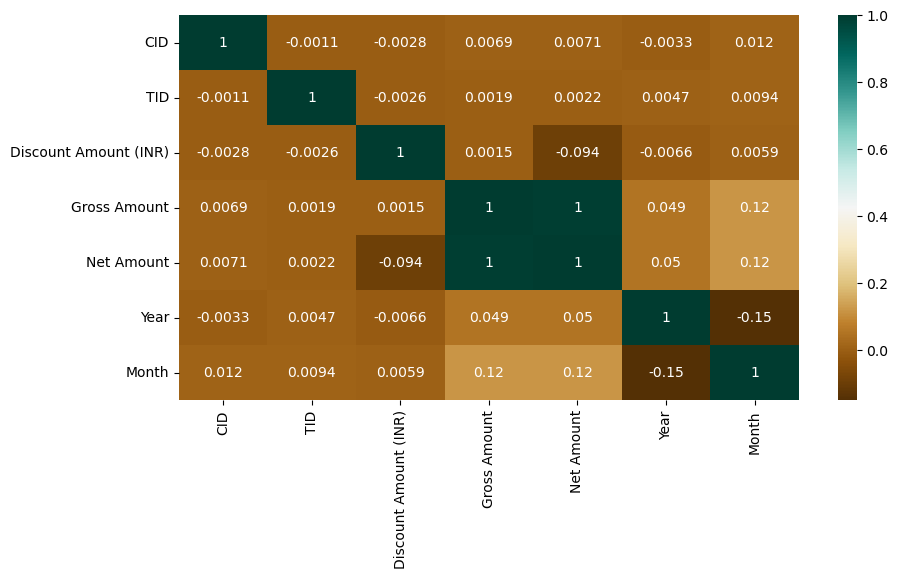

In [26]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#### Scatterplot: Identify correlations between variables. 

Here the scatter plots are plotted between 
Product Category, Gross Amount and Monthly sales

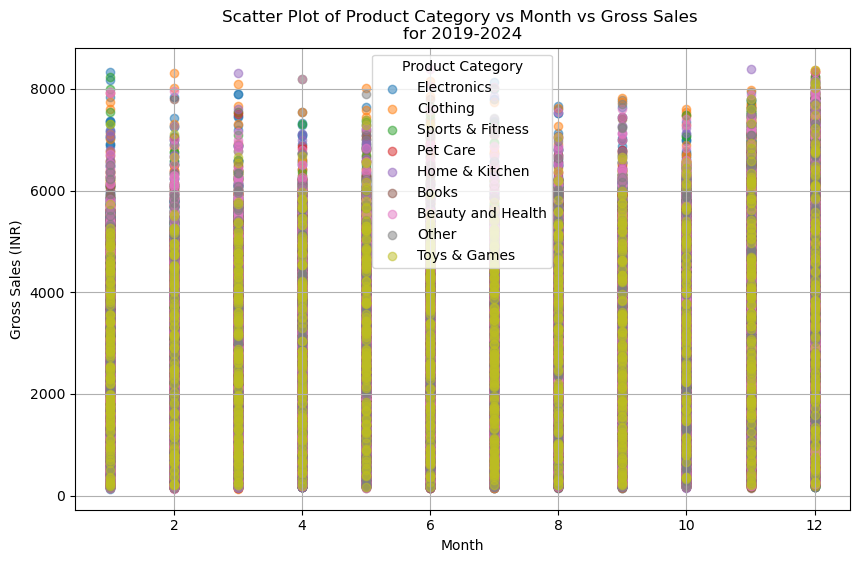

In [27]:
# Create a scatter plot using 'Product Category', 'Month', and 'Gross Amount'
plt.figure(figsize=(10, 6))

# Plot Gross Amount vs Month, with color representing different Product Categories
for category in df['Product Category'].unique():
    subset = df[df['Product Category'] == category]
    plt.scatter(subset['Month'], subset['Gross Amount'], alpha=0.5, label=category)

# Adding labels, title, and legend
plt.title('Scatter Plot of Product Category vs Month vs Gross Sales \nfor 2019-2024')
plt.xlabel('Month')
plt.ylabel('Gross Sales (INR)')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()

#### Bar Graph displaying Gross Sales Contribution by Age Group

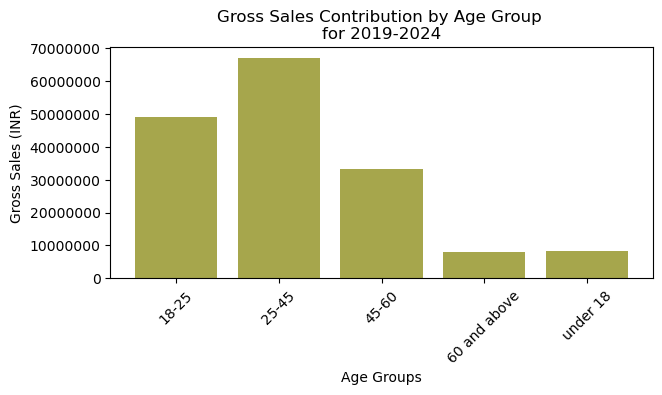

In [28]:
# Calculate total gross sales for each age group
age_group_sales = df.groupby('Age Group')['Gross Amount'].sum().reset_index()

# Plot Age Group vs Gross Sales Contribution
plt.figure(figsize=(7, 3))
plt.bar(age_group_sales['Age Group'], age_group_sales['Gross Amount'], color='olive', alpha=0.7)

# Adding labels and title
plt.title('Gross Sales Contribution by Age Group \nfor 2019-2024')
plt.xlabel('Age Groups')
plt.ylabel('Gross Sales (INR)')
plt.xticks(rotation=45)
plt.grid(False)
plt.ticklabel_format(axis="y", style="plain")  # Ensuring y-ticks display in actual values
plt.show()

#### Bar Graph displaying Gross Sales Contribution by Gender

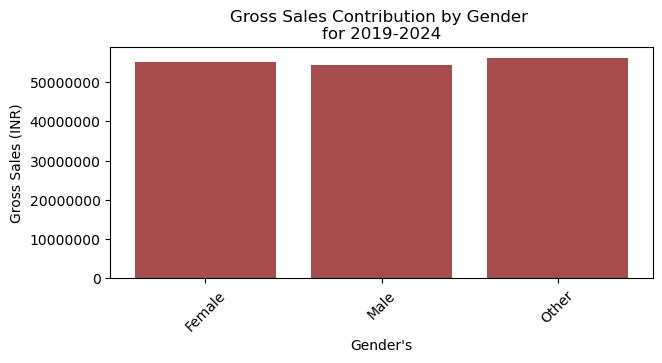

In [29]:
# Calculate total gross sales for each age group
age_group_sales = df.groupby('Gender')['Gross Amount'].sum().reset_index()

# Plot Age Group vs Gross Sales Contribution
plt.figure(figsize=(7, 3))
plt.bar(age_group_sales['Gender'], age_group_sales['Gross Amount'], color='maroon', alpha=0.7)

# Adding labels and title
plt.title('Gross Sales Contribution by Gender \nfor 2019-2024')
plt.xlabel("Gender's")
plt.ylabel('Gross Sales (INR)')
plt.xticks(rotation=45)
plt.grid(False)
plt.ticklabel_format(axis="y", style="plain")  # Ensuring y-ticks display in actual values
plt.show()

#### Bar Graph displaying Gross Sales Contribution by Product Category

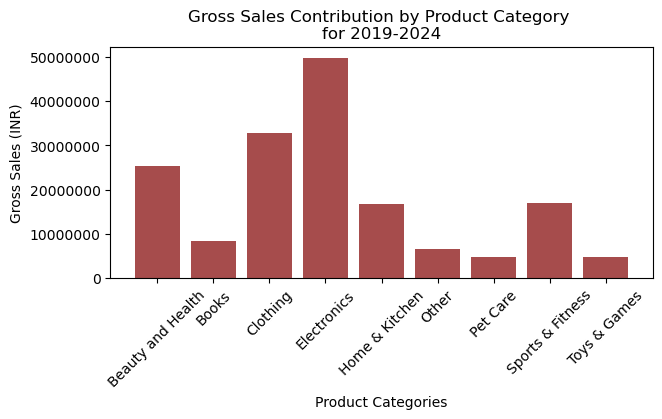

In [30]:
# Calculate total gross sales for each age group
age_group_sales = df.groupby('Product Category')['Gross Amount'].sum().reset_index()

# Plot Age Group vs Gross Sales Contribution
plt.figure(figsize=(7, 3))
plt.bar(age_group_sales['Product Category'], age_group_sales['Gross Amount'], color='maroon', alpha=0.7)

# Adding labels and title
plt.title('Gross Sales Contribution by Product Category \nfor 2019-2024')
plt.xlabel('Product Categories')
plt.ylabel('Gross Sales (INR)')
plt.xticks(rotation=45)
plt.grid(False)
plt.ticklabel_format(axis="y", style="plain")  # y-ticks displayING in actual values instead of 10^7
plt.show()

#### Bar Graph displaying Gross Sales Contribution by Product Category for 2024 sales

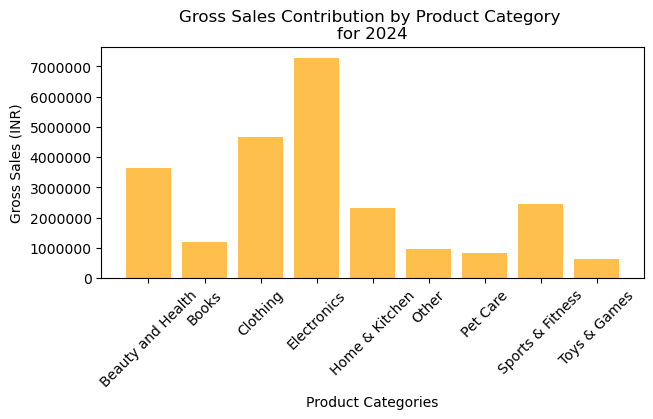

In [31]:
# Filter the dataset for the year 2024
df_2024 = df[df['Year'] == 2024]

# Calculate total gross sales for each product category in 2024
age_group_sales_2024 = df_2024.groupby('Product Category')['Gross Amount'].sum().reset_index()

# Plot Gross Sales Contribution by Product Category for 2024
plt.figure(figsize=(7, 3))
plt.bar(age_group_sales_2024['Product Category'], age_group_sales_2024['Gross Amount'], color='orange', alpha=0.7)

# Adding labels and title
plt.title('Gross Sales Contribution by Product Category \nfor 2024')
plt.xlabel('Product Categories')
plt.ylabel('Gross Sales (INR)')
plt.xticks(rotation=45)
plt.grid(False)
plt.ticklabel_format(axis="y", style="plain")  # y-ticks displayING in actual values instead of 10^7
plt.show()

#### Bar Graph displaying Gross Sales Trend over the years

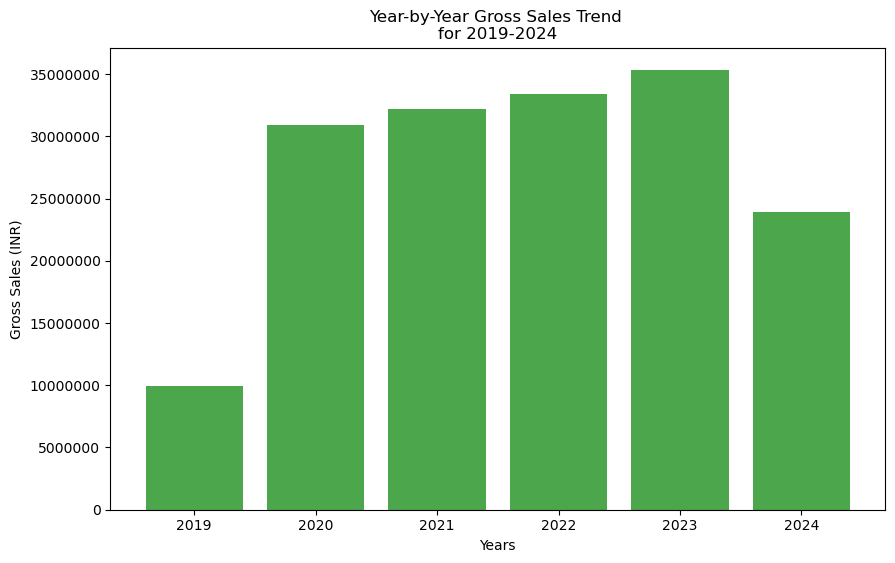

In [32]:
# Calculate total gross sales for each year
yearly_sales = df.groupby('Year')['Gross Amount'].sum().reset_index()

# Plot Year-by-Year Sales Contribution
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Gross Amount'], color='green', alpha=0.7)

# Adding labels and title
plt.title('Year-by-Year Gross Sales Trend \nfor 2019-2024')
plt.xlabel('Years')
plt.ylabel('Gross Sales (INR)')
plt.grid(False)
plt.ticklabel_format(axis="y", style="plain")  # Ensuring y-ticks display in actual values
plt.show()

#### Grouped Bar Chart showing the Usage of Discount Campaign by Users

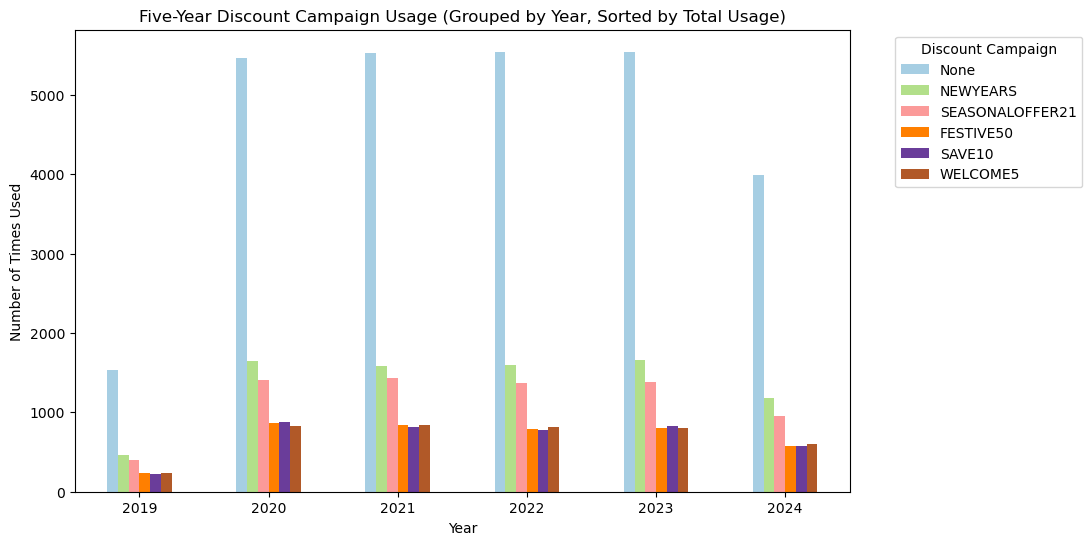

In [34]:
# Pivot the data to get discount campaigns as columns
discount_usage_pivot = df.pivot_table(index='Year', columns='Discount Name', aggfunc='size', fill_value=0)

#Calculate total usage for each discount campaign
total_usage = discount_usage_pivot.sum().sort_values(ascending=False)

#Reorder the columns of the pivot table based on the total usage
discount_usage_pivot_sorted = discount_usage_pivot[total_usage.index]

#Plot a grouped bar chart with the sorted discount campaigns
discount_usage_pivot_sorted.plot(kind='bar', figsize=(10, 6), colormap='Paired')

#Plotting the graph
plt.title('Five-Year Discount Campaign Usage (Grouped by Year, Sorted by Total Usage)')
plt.xlabel('Year')
plt.ylabel('Number of Times Used')
plt.xticks(rotation=0)
plt.legend(title='Discount Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

#### Conclusion

This notebook generated a synthetic dataset mimicking real-world e-commerce transactions using the Python `Faker` library. The dataset contains detailed information such as customer demographics, product categories, payment methods, and discount campaigns, making it a valuable resource for practicing data cleaning, exploratory data analysis (EDA), and visualization.

Key insights derived from the analysis include:
- **Sales Trends**: Gross sales have grown steadily from 2019 to 2024, with peaks observed during seasonal discounts.
- **Product Category Contributions**: Electronics and Clothing have consistently contributed the most to gross sales.
- **Customer Demographics**: The age group of 25-45 contributed the highest gross sales, while the gender distribution was relatively balanced.
- **Discount Campaigns**: Certain discount campaigns (e.g., `NEWYEARS` and `FESTIVE50`) saw more frequent usage, particularly towards the end of the year.

This dataset can further be used for predictive modeling, machine learning, and customer segmentation analyses.
